# COMP7404 - Assignment 4

## Part A: Conceptual Questions

Solve the following questions by hand. You can write your answer on a seperate paper (submit as *.pdf) or type it below and submit together with Part B as a single *.ipynb file.


### A1
Consider a Perceptron with 2 inputs and 1 output. Let the weights of the Perceptron be $w_1 = 1$ and $w_2 = 1$ and let the bias be $w_0 = -1.5$. Calculate the output of the following inputs:(0, 0), (1, 0), (0, 1), (1, 1)

In [ ]:
1.(0, 0):
    input = w1x1 + w2x2 + w0 = 1*0 + 1*0 + (-1.5) = -1.5
    output = f(-1.5) = 0
2.(1, 0):
    input = w1x1 + w2x2 + w0 = 1*1 + 1*0 + (-1.5) = -0.5
    output = f(-0.5) = 0
3.(0, 1):
    input = w1x1 + w2x2 + w0 = 1*0 + 1*1 + (-1.5) = -0.5
    output = f(-0.5) = 0
4.(1, 1):
    input = w1x1 + w2x2 + w0 = 1*1 + 1*1 + (-1.5) = 0.5
    output = f(0.5) = 1

### A2
Define a perceptron for the following logical functions: AND, NOT, NAND, NOR


In [ ]:
1. AND:
    input: x1, x2
    weights: w1 = 1, w2 = 1
    bias: w0 = -1.5
    Activation function f(x): 0 if x < 0, 1 if x ≥ 0
    Output: 1 if x1 = 1 and x2 = 1, 0 otherwise
2. NOT:
    input: x
    weights: w = 1(any positive number)
    bias: w0 = -0.5(any negative number)
    Activation function f(x): 1 if x < 0, 0 if x ≥ 0
    Output: 1 if x = 0, 0 if x = 1
3. NAND:
    input: x1, x2
    weights: w1 = -1, w2 = -1
    bias: w0 = 1
    Activation function f(x): 0 if x < 0, 1 if x ≥ 0
    Output: 0 if x1 = 1 and x2 = 1, 1 otherwise
4. NOR:
    input: x1, x2
    weights: w1 = -1, w2 = -1
    bias: w0 = -0.5
    Activation function f(x): 0 if x < 0, 1 if x ≥ 0
    Output: 1 if x1 = 0 and x2 = 0, 0 otherwise

### A3
The parity problem returns 1 if the number of inputs that are 1 is even, and 0 otherwise. Can a perceptron learn this problem for 3 inputs? 


In [ ]:
(0, 0, 0) → Output: 1
(0, 0, 1) → Output: 0
(0, 1, 0) → Output: 0
(1, 0, 0) → Output: 0
(1, 1, 0) → Output: 1
(0, 1, 1) → Output: 1
(1, 0, 1) → Output: 1
(1, 1, 1) → Output: 0

Two-dimensional perceptron cannot solve this problem. Since we cannot find a hyperplane separating 3-dimensional space.
Perceptron with high dimension can solve 3 inputs.

### A4
Suppose that the following are a set of point in two classes:

*   Class1: $(1, 1), (1, 2), (2, 1)$
*   Class2: $(0, 0), (1, 0), (0, 1)$

Plot them and find the optimal separating line. What are the support vectors, and what is the meaning?


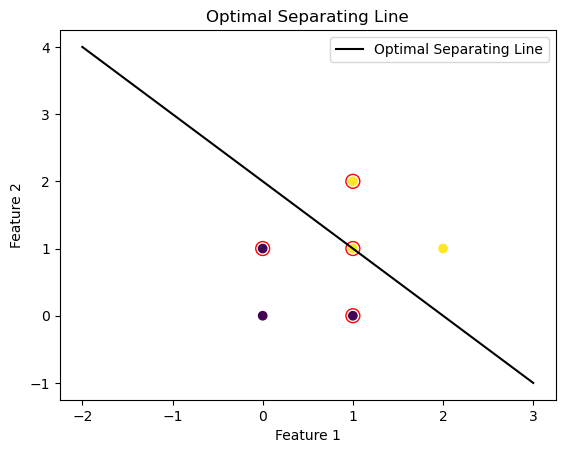

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

X = np.array([(1, 1), (1, 2), (2, 1), (0, 0), (1, 0), (0, 1)])
y = np.array([1, 1, 1, 0, 0, 0])

clf = SVC(kernel='linear')
clf.fit(X, y)
support_vectors = clf.support_vectors_

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Optimal Separating Line')

w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2, 3)
yy = a * xx - (clf.intercept_[0]) / w[1]
plt.plot(xx, yy, 'k-', label='Optimal Separating Line')

plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, facecolors='none', edgecolors='r')
plt.legend()
plt.show()

In [ ]:
Meaning
Use SVM algorithm for binary classification, define a boundary to separate two classification
The line is decision boundary
Support vectors are the data points from each class that lie closest to the optimal separating line.

### A5
Suppose that the probability of five events are $P(first) = 0.5, P(second) = P(third) = P(fourth) = P(fifth) = 0.125$. Calculate the entropy and write down in words what this means. 


In [ ]:
Entropy = -Σ P(x) log2 P(x)

Entropy = -[0.5*log2 0.5 + 4 * 0.125*log2 0.125]
= -[-0.5 - 1.5]
= 2

### A6
Design a decision tree that computes the logical AND function. How does it compare to the Perceptron solution?

In [7]:
from sklearn.tree import DecisionTreeClassifier

X = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [0, 0, 0, 1]

clf = DecisionTreeClassifier()
clf.fit(X, y)

print("Decision Tree Predictions Result:")
for node in X:
    print(f"Inputs: {node}, Output: {clf.predict([node])[0]}")

Decision Tree Predictions Result:
Inputs: [0, 0], Output: 0
Inputs: [0, 1], Output: 0
Inputs: [1, 0], Output: 0
Inputs: [1, 1], Output: 1


In [ ]:
Comparison:
Decision tree method directly builds a tree structure, which simulates the operation process of AND logic.
Perceptron solutoin implements classification of AND logic by learning appropriate weights and biases.

### A7
Turn the following politically incorrect data into a decision tree to classify which attributes make a person attractive, and then extract the rules. Use the Gini Impurity.

| Height  | Hair  | Eyes  | Attractive?  |
|:-:|:-:|:-:|:-:|
| Small  | Blonde  | Brown  | No  |
| Tall  | Dark  | Brown  | No  |
| Tall  | Blonde  | Blue  | Yes  |
| Tall  | Dark  | Blue  | No  |
| Small  | Dark  | Blue  | No  |
| Tall  | Red  | Blue  | Yes  |
| Tall  | Blonde  | Brown  | No  |
| Small  | Blonde  | Blue  | Yes  |


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

import pandas as pd
from sklearn.preprocessing import LabelEncoder

data = [
    ['Small', 'Blonde', 'Brown', 'No'],
    ['Tall', 'Dark', 'Brown', 'No'],
    ['Tall', 'Blonde', 'Blue', 'Yes'],
    ['Tall', 'Dark', 'Blue', 'No'],
    ['Small', 'Dark', 'Blue', 'No'],
    ['Tall', 'Red', 'Blue', 'Yes'],
    ['Tall', 'Blonde', 'Brown', 'No'],
    ['Small', 'Blonde', 'Blue', 'Yes']
]

df = pd.DataFrame(data, columns=['Height', 'Hair', 'Eyes', 'Attractive?'])

le = LabelEncoder()
df['Height'] = le.fit_transform(df['Height'])
df['Hair'] = le.fit_transform(df['Hair'])
df['Eyes'] = le.fit_transform(df['Eyes'])
df['Attractive?'] = le.fit_transform(df['Attractive?'])

#print(df)

X = df.drop(columns='Attractive?')
y = df['Attractive?']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(report)

feature_importances = model.feature_importances_
feature_names = X.columns

for i, importance in enumerate(feature_importances):
    print(f"Feature: {feature_names[i]}, Importance: {importance}")

Accuracy: 0.5
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

Feature: Height, Importance: 0.0
Feature: Hair, Importance: 0.24999999999999997
Feature: Eyes, Importance: 0.75


D:\LenovoSoftstore\anaconda\envs\cherry\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\LenovoSoftstore\anaconda\envs\cherry\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\LenovoSoftstore\anaconda\envs\cherry\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

Feature: Height, Importance: 0.0

Feature: Hair, Importance: 0.24999999999999997

Feature: Eyes, Importance: 0.75

### A8
Suppose we collect data for a group of students in a postgraduate machine learning class with features $x_1$ = hours studies, $x_2$ = undergraduate GPA and label $y$ = receive an A. We fit a logistic regression and produce estimated weights as follows: $w_0 = -6$, $w_1 = 0.05$, $w_2 = 1$.

1.  Estimate the probability that a student who studies for 40h and has an undergraduate GPA of 3.5 gets an A in the class
2.  How many hours would the student in part 1. need to study to have a 50% chance of getting an A in the class?

In [15]:
import numpy as np
from scipy.special import expit

w0 = -6
w1 = 0.05
w2 = 1
x1 = 40
x2 = 3.5

p = 1 / (1 + np.exp(-(w1*x1 + w2*x2 + w0)))
print(f"1. Possibility: {p:.4f}")

time = (-w0 - w2*x2) / w1
print(f"2. {time:.2f} hours is needed to have 50% chance of getting an A in the class")

1. Possibility: 0.3775
2. 50.00 hours is needed to have 50% chance of getting an A in the class


Answer:
1. Possibility: 0.3775
2. 50.00 hours is needed to have 50% chance of getting an A in the class

### A9
Suppose that we take a data set, divide it into equally-sized training and test sets, and then try out two different classification procedures. First we use logistic regression and get an error rate of 20% on the training data and 30% on the test data. Next we use 1-nearest neighbors (i.e., K=1) and get an average error rate (averaged over both test and training data sets) of 18%. Based on these results, which method should we prefer to use for classification of new observations? Why?

In [ ]:
I think we should prefer 1-nearest neighbors method.
The accruacy on training dataset is basically the same, but accuracy on testing dataset varies.

18% to 30% indicates that 1-nearest neighbors model appears to generalize better, 
with a lower error rate on the unseen testing data compared to the logistic regression model.

1-nearest neighbors model may be better able to capture the underlying patterns in the data 
and make more accurate predictions on new, previously unseen observations.

### A10

Suppose the features in your training set have very different scales. Which algorithms discussed in class might suffer from this, and how? What can you do about it?


In [ ]:
StandardScaler class from scikit-learn's preprocessing module

StandardScaler will transform all features to have zero mean and unit variance, 
effectively normalizing the scales and preventing features to have different scales. 
By applying this preprocessing step, we can ensure that all features are treated equally by the machine learning algorithms, 
regardless of their original scales.

### A11


If your AdaBoost ensemble underfits the training data, which hyperparameters should you tweak and how?

In [ ]:
1. Learning Rate
Decreasing the learning rate can slow down the learning process, allowing the model to better fit the training data.
2. The Number of Estimators
In AdaBoost, the number of estimators controls how many weak learners are added to the model.
Increasing the number of estimators can help the model better capture the feature of the training data, reducing underfitting.

### A12

What is the benefit of out-of-bag evaluation?

In [ ]:
of out-of-bag (OOB) evaluation provides an unbiased estimate of the model's performance without the need for a separate validation or test set.

As for benefits:
1. No need for test and valid set
    Each training sample is used for both training and testing, no need for a separate validation or test set,
    all dataset can be used for training
2.Unbiased performance
    Unlike random split of the data into training and test sets, the test set performance may be biased by the specific split.
    But this method offers a unbiased performance.
3. No need for cross-validation
    No need for cross-validation, saving time and computational resources.

### A13

What is the difference between hard and soft voting classifiers?

In [ ]:
Hard Voting Classifier
    In hard voting, each classifier in the model makes a prediction, and the final prediction is determined by a majority vote among all classifiers.
    each model outputs a class label, it is usually a discrete value.
    The most votes is chosen as the final output.

Soft Voting Classifier
    In soft voting, each classifier outputs a probability distribution over the class labels, not a predicted class label. 
    The final prediction is based on the averaged probabilities.
    The probabilities are averaged across all classifiers for each class, the class with the highest average probability is selected as the final prediction.

## Part B: Applied Questions

Solve the following questions by implementing solutions in code.

### B1
Consider the following Perceptron code.

In [8]:
import numpy as np

class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [9]:
import pandas as pd

data_src = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

df = pd.read_csv(data_src, header=None)

df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


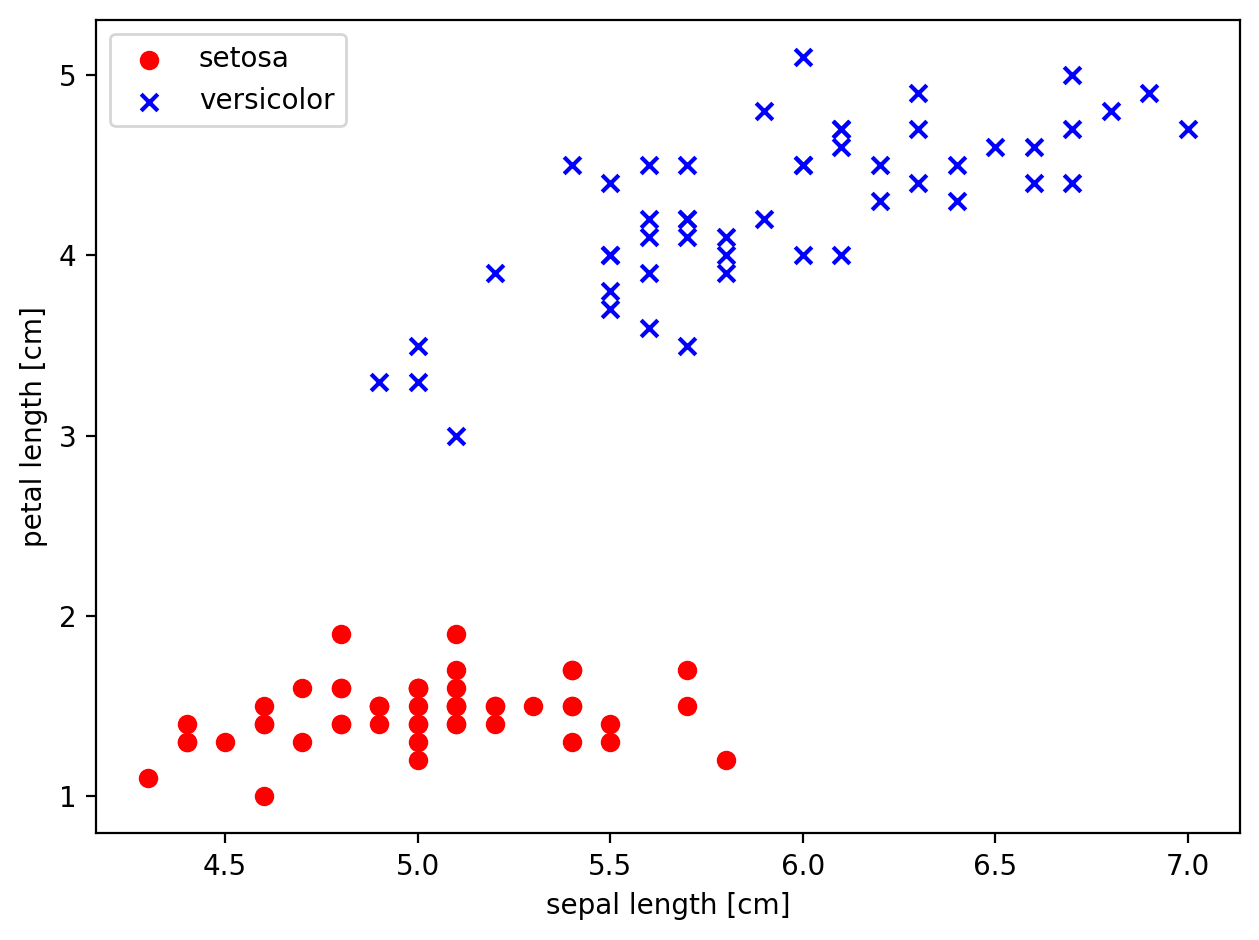

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [11]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn = ppn.fit(X, y)

In [12]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.01):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

As shown in function plot_decision_regions, the decision regions can be visualized by dense sampling via meshgrid. However, if the grid resolution is not enough, as artificially set below, the boundary will appear inaccurate.

Implement function plot_decision_boundary below to analytically compute and plot the decision boundary.

In [31]:
def plot_decision_boundary(X, y, classifier, resolution = 0.01):    
    
    # # replace the two lines below with your code
    # x1_interval = [X[:, 0].min() - 1, X[:, 0].max() + 1]
    # x2_interval = [X[:, 1].min() - 1, X[:, 1].max() + 1]
    # plt.plot(x1_interval, x2_interval, color='green', linewidth=4, label='boundary')
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                        np.arange(y_min, y_max, resolution))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, levels=[0], colors='green', linewidths=3)
    plt.plot([], [], color='green', linewidth=3, label='boundary')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

C:\Users\12149\AppData\Local\Temp\ipykernel_11932\2359105906.py:16: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


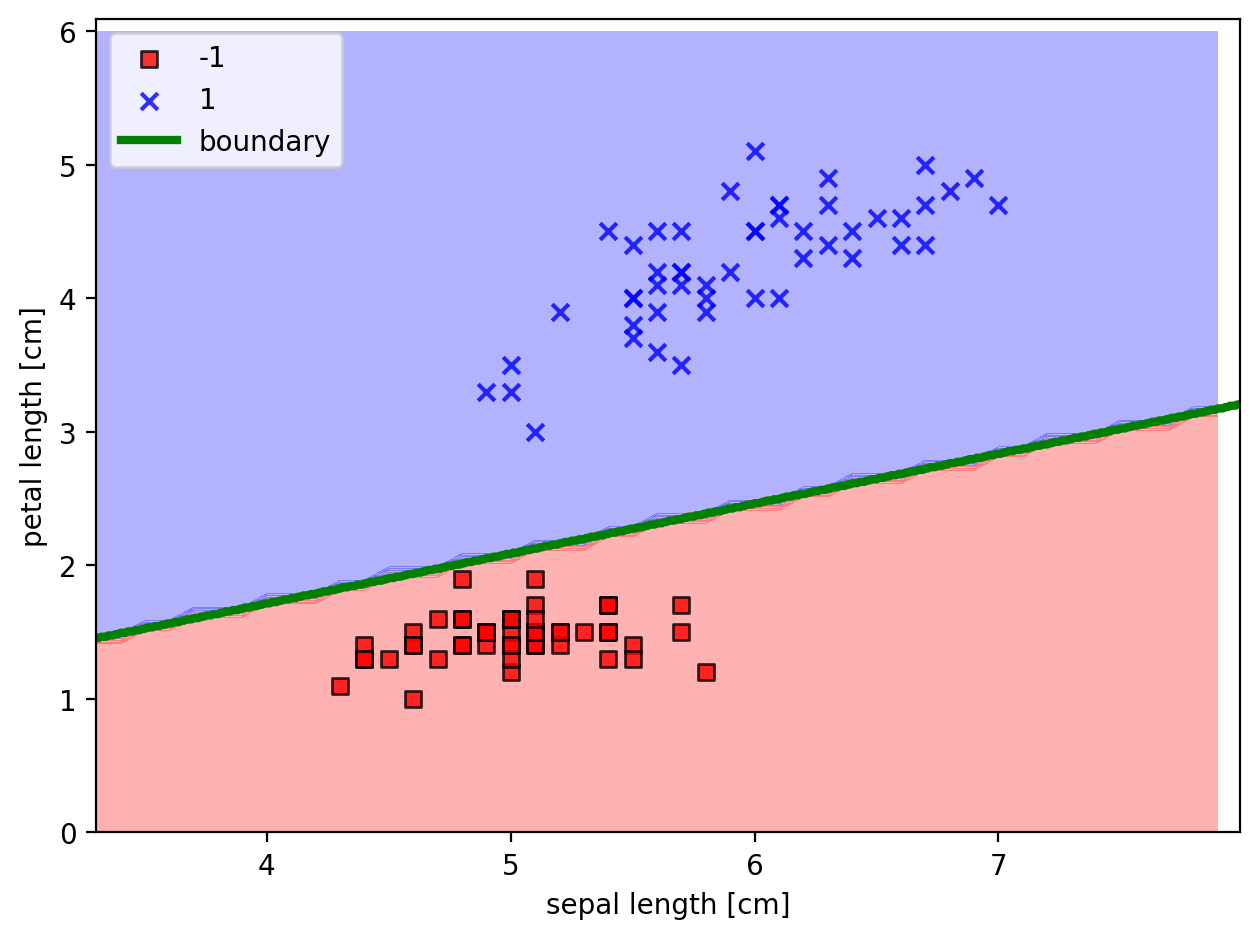

In [32]:
low_res = 0.1 # intentional for this exercise
plot_decision_regions(X, y, classifier=ppn, resolution=low_res)
plot_decision_boundary(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### B2

In class we applied different scikit-learn classifers for the Iris data set.

In this question, we will apply the same set of classifiers over a different data set: hand-written digits.
Please write down the code for different classifiers, choose their hyper-parameters, and compare their performance via the accuracy score as in the Iris dataset.
Which classifier(s) perform(s) the best and worst, and why?

The classifiers include:
* perceptron
* logistic regression
* SVM
* decision tree
* random forest
* KNN

The dataset is available as part of scikit learn, as follows.

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

X = digits.data # training data
y = digits.target # training label

print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


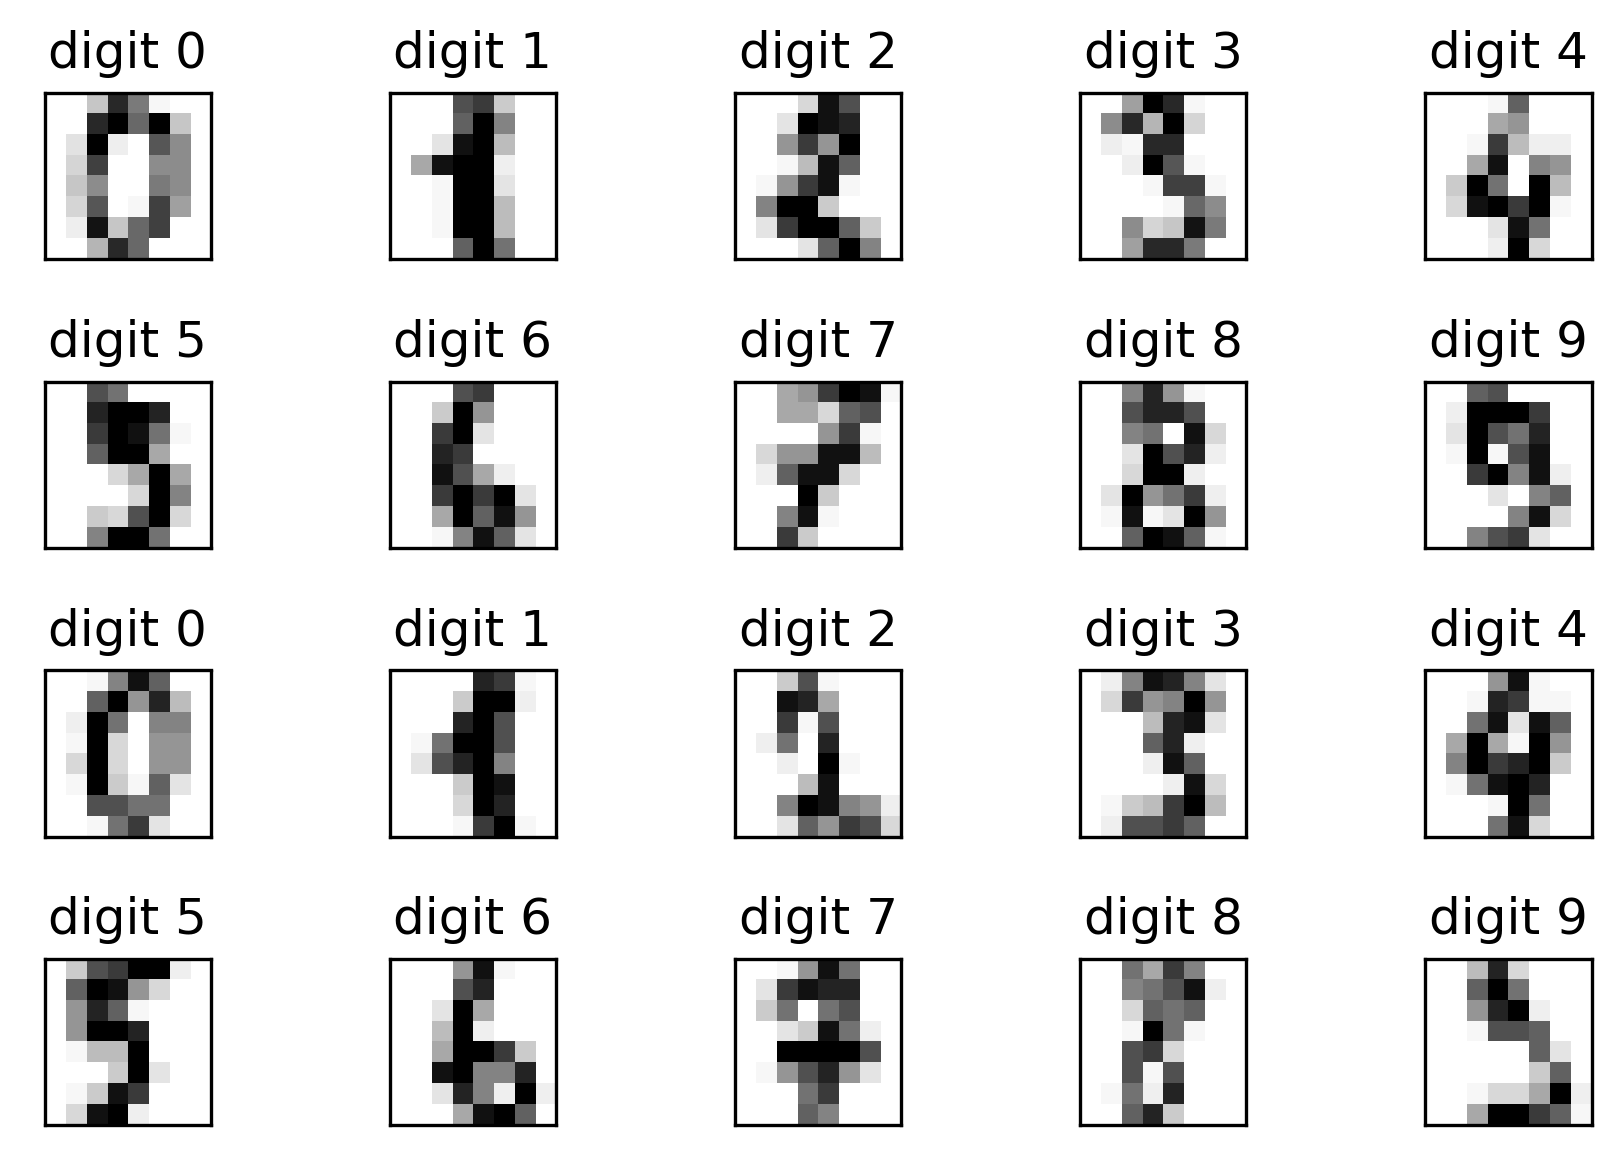

In [ ]:
import matplotlib.pyplot as plt
import pylab as pl
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
num_rows = 4
num_cols = 5
fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, sharex=True, sharey=True)
ax = ax.flatten()
for index in range(num_rows*num_cols):
    img = digits.images[index]
    label = digits.target[index]
    ax[index].imshow(img, cmap='Greys', interpolation='nearest')
    ax[index].set_title('digit ' + str(label))
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

Date Preprocessing

Hint: Divide training and test data set and apply other techinques we have learned if needed.

In [43]:
#Your code here
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

digits = load_digits()
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Classifier #1 Perceptron

In [48]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.linear_model import Perceptron

perceptron_model = Perceptron(random_state=42)
perceptron_model.fit(X_train_scaled, y_train)

train_accuracy = perceptron_model.score(X_train_scaled, y_train)
test_accuracy = perceptron_model.score(X_test_scaled, y_test)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.9693806541405706
Test Accuracy: 0.9555555555555556


Classifier #2 Logistic Regression

In [49]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_scaled, y_train)

y_pred = logistic_regression_model.predict(X_test_scaled)
train_accuracy = logistic_regression_model.score(X_train_scaled, y_train)
test_accuracy = accuracy_score(y_test, y_pred)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.9986082115518441
Test Accuracy: 0.9722222222222222


Classifier #3 SVM

In [50]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

y_pred = svm_model.predict(X_test_scaled)
train_accuracy = svm_model.score(X_train_scaled, y_train)
test_accuracy = accuracy_score(y_test, y_pred)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 1.0
Test Accuracy: 0.975


Classifier #4 Decision Tree

In [51]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train_scaled, y_train)

train_accuracy = decision_tree_model.score(X_train_scaled, y_train)
test_accuracy = decision_tree_model.score(X_test_scaled, y_test)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 1.0
Test Accuracy: 0.8416666666666667


Classifer #5 Random Forest

In [52]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train_scaled, y_train)

train_accuracy = random_forest_model.score(X_train_scaled, y_train)
test_accuracy = random_forest_model.score(X_test_scaled, y_test)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 1.0
Test Accuracy: 0.9722222222222222


Classifier #6 KNN

In [53]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

train_accuracy = knn_model.score(X_train_scaled, y_train)
test_accuracy = knn_model.score(X_test_scaled, y_test)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.9867780097425192
Test Accuracy: 0.975


In [ ]:
Summary:

Perceptron: 
    Training Accuracy: 0.9693806541405706
    Test Accuracy: 0.9555555555555556

Logistic Regression:
    Training Accuracy: 0.9986082115518441
    Test Accuracy: 0.9722222222222222

SVM:
    Training Accuracy: 1.0
    Test Accuracy: 0.975

Decision Tree:
    Training Accuracy: 1.0
    Test Accuracy: 0.8416666666666667

Random Froest:
    Training Accuracy: 1.0
    Test Accuracy: 0.9722222222222222

KNN:
    Training Accuracy: 0.9867780097425192
    Test Accuracy: 0.975

We mainly focus on test accuracy, since it can be served as a metric to evaluate the performance on unseen dataset.
1. Best: KNN and SVM have the highest test accuracy, these two models performance the best.
2. Worst: Decision Tree training accuracy is 1.0, but testing accuracy is relatively low(0.84), indicating this model may be overfitting, 
    and performs the worst among these models. 

### B3
Build a spam classifier:



*   Download examples of spam and ham from Apache SpamAssassin’s public datasets.
*   Unzip the datasets and familiarize yourself with the data format.
*   Split the datasets into a training set and a test set.
*   Write a data preparation pipeline to convert each email into a feature vector. Your preparation pipeline should transform an email into a (sparse) vector that indicates the presence or absence of each possible word. For example, if all emails only ever contain four words, “Hello,” “how,” “are,” “you,” then the email “Hello you Hello Hello you” would be converted into a vector [1, 0, 0, 1] (meaning [“Hello” is present, “how” is absent, “are” is absent, “you” is present]), or [3, 0, 0, 2] if you prefer to count the number of occurrences of each word.
*   You may want to add hyperparameters to your preparation pipeline to control whether or not to strip off email headers, convert each email to lowercase, remove punctuation, replace all URLs with “URL,” replace all numbers with “NUMBER,” or even perform stemming (i.e., trim off word endings; there are Python libraries available to do this).

*   Finally, try out several classifiers and see if you can build a great spam classifier, with both high recall and high precision.

STEP1-3:
1. Download datasets
2. Unzip
3. Split into training and test set.

In [1]:
import os
import urllib.request
import tarfile
import shutil
import numpy as np
import glob
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [2]:
def create_directories():
    dirs = {
        'datasets': 'datasets',
        'tar': os.path.join('datasets', 'tar')
    }
    for dir_path in dirs.values():
        os.makedirs(dir_path, exist_ok=True)
    return dirs

def retrieve_archive(url, cache_dir):
    filename = url.split('/')[-1]
    local_path = os.path.join(cache_dir, filename)
    
    if not os.path.exists(local_path):
        urllib.request.urlretrieve(url, local_path)
    
    return local_path

def extract_content(archive_path, extract_dir):
    with tarfile.open(archive_path) as tar:
        dirname = os.path.join('datasets', tar.getnames()[0])
        if os.path.isdir(dirname):
            shutil.rmtree(dirname)
        tar.extractall(path='datasets')

        cmds_path = os.path.join(dirname, 'cmds')
        if os.path.isfile(cmds_path):
            os.remove(cmds_path)
        
    return dirname

def collect_file_contents(directory):
    texts = []
    for filepath in glob.glob(os.path.join(directory, '*')):
        with open(filepath, 'rb') as f:
            content = f.read().decode('utf-8', errors='ignore')
            texts.append(content)
    return texts

def prepare_dataset():
    source_links = {
        'spam': 'https://spamassassin.apache.org/old/publiccorpus/20050311_spam_2.tar.bz2',
        'easy_ham': 'https://spamassassin.apache.org/old/publiccorpus/20030228_easy_ham_2.tar.bz2',
        'hard_ham': 'https://spamassassin.apache.org/old/publiccorpus/20030228_hard_ham.tar.bz2'
    }
    
    create_directories()
    
    collections = []
    labels = []
    
    for category, url in source_links.items():
        archive_path = retrieve_archive(url, os.path.join('datasets', 'tar'))
        content_dir = extract_content(archive_path, 'datasets')
        category_content = collect_file_contents(content_dir)
        
        collections.extend(category_content)
        labels.extend([1 if category == 'spam' else 0] * len(category_content))
    
    X, y = shuffle(collections, labels, random_state=42)
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )
    
    return X_train, X_test, y_train, y_test


In [3]:
X_train, X_test, y_train, y_test = prepare_dataset()
print(f"Training samples size: {len(X_train)}")
print(f"Testing samples size: {len(X_test)}")

Training samples size: 2436
Testing samples size: 610


STEP4:
data perparation, feature vector

In [4]:
import re
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

class EmailCleaner():
    def __init__(self, remove_header=True, lowercase=True, replace_urls=True, replace_numbers=True, remove_punctuation=True):
        self.remove_header = remove_header
        self.lowercase = lowercase
        self.replace_urls = replace_urls
        self.replace_numbers = replace_numbers
        self.remove_punctuation = remove_punctuation

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        cleaned_emails = []
        for email in X:
            if self.remove_header:
                email = email.split('\n\n', 1)[-1]  # Remove header
            if self.lowercase:
                email = email.lower()

            words = email.split()
            if self.replace_urls:
                words = [self._replace_if_url(word) for word in words]
            if self.replace_numbers:
                words = [self._replace_if_number(word) for word in words]
            if self.remove_punctuation:
                email = self._remove_punctuations(' '.join(words))
            else:
                email = ' '.join(words)

            cleaned_emails.append(email)
        return cleaned_emails

    def _replace_if_url(self, word):
        return 'URL' if re.match(r"http[s]?://\S+", word) else word

    def _replace_if_number(self, word):
        return 'NUM' if word.isdigit() else word

    def _remove_punctuations(self, text):
        return ''.join(char for char in text if char.isalnum() or char.isspace())

pipeline = Pipeline([
    ('email_cleaner', EmailCleaner()),
    ('vectorizer', CountVectorizer())
])

X_train = pipeline.fit_transform(X_train)

STEP5: model training
DecisionTree
RandomForest
KNN
SVM

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score


classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC()
}

def metrics(y_pred, y_train):
    precision = precision_score(y_train, y_pred)
    recall = recall_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred)
    return {'precision': precision, 'recall': recall, 'f1': f1}

prediction = {}
for name, clf in classifiers.items():
    prediction[name] = cross_val_predict(clf, X_train, y_train, cv=3)

print("Accuracy of each models:")
for name, y_pred in prediction.items():
    print("{}:{}\n".format(name, accuracy_score(y_train, y_pred)))

for name, y_pred in prediction.items():
    conf = metrics(y_pred, y_train)
    print("{}:".format(name))
    print("recall: {} precision: {} f1-score: {}\n".format(conf['recall'], conf['precision'], conf['f1']))

Accuracy of each models:
Decision Tree:0.9220032840722496

Random Forest:0.9692118226600985

KNN:0.9072249589490968

SVM:0.8682266009852216

Decision Tree:
recall: 0.9166666666666666 precision: 0.9133928571428571 f1-score: 0.9150268336314848

Random Forest:
recall: 0.9758064516129032 precision: 0.9577836411609498 f1-score: 0.966711051930759

KNN:
recall: 0.8888888888888888 precision: 0.906764168190128 f1-score: 0.897737556561086

SVM:
recall: 0.746415770609319 precision: 0.9563719862227325 f1-score: 0.8384499245093106



Conclusion

By evaluating the metrics of these four models, 
Random Forest is the best model, with high recall, precision and f1-score. Also has decent accuracy of the model.